In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# concat train and test for cleaning
combine_df = pd.concat((train_df, test_df))

In [26]:
# How many samples are there in the training set? 
len(train_df)
# There are 1,460 rows in the training set.

1460

In [5]:
#How many features?

# There are 80 features
len(train_df.keys())
# The keys are 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
#       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
#       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
#       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
#       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
#       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
#       'SaleCondition', 'SalePrice'

81

In [6]:
# Which features are categorical?
cat_features=[i for i in combine_df.columns if train_df.dtypes[i]=='object']

cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

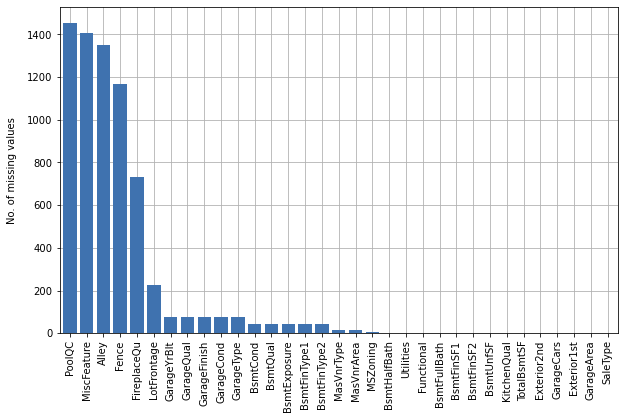

In [7]:
# What variables seem to be important? 
# Find features that contain NA values
nans = test_df.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
nans
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [8]:
# Fill values with NA values
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]
combine_df[cols] = combine_df[cols].fillna("None")
cols = ["GarageYrBlt", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageCars"]
combine_df[cols] = combine_df[cols].fillna(0)
cols = ["MasVnrType", "MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "KitchenQual", "Functional"]
combine_df[cols] = combine_df.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))
cols = ["GarageArea", "LotFrontage"]
combine_df[cols] = combine_df.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.median()))

Text(0, 0.5, 'Correlation')

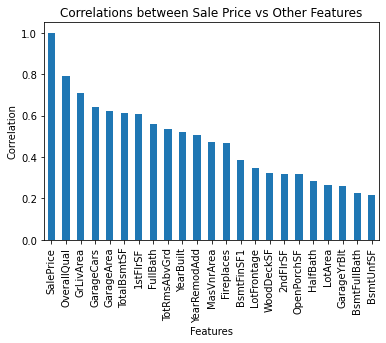

In [9]:
# Which seem to correlate with the sale price? 
top_correlations = combine_df.corr()
top_feature_columns = top_correlations['SalePrice'][top_correlations['SalePrice'].values > 0.2].sort_values(ascending=False)
top_feature_columns.plot.bar(x='lab', y='val')
top_feature_columns
plt.title("Correlations between Sale Price vs Other Features")
plt.xlabel("Features")
plt.ylabel("Correlation")

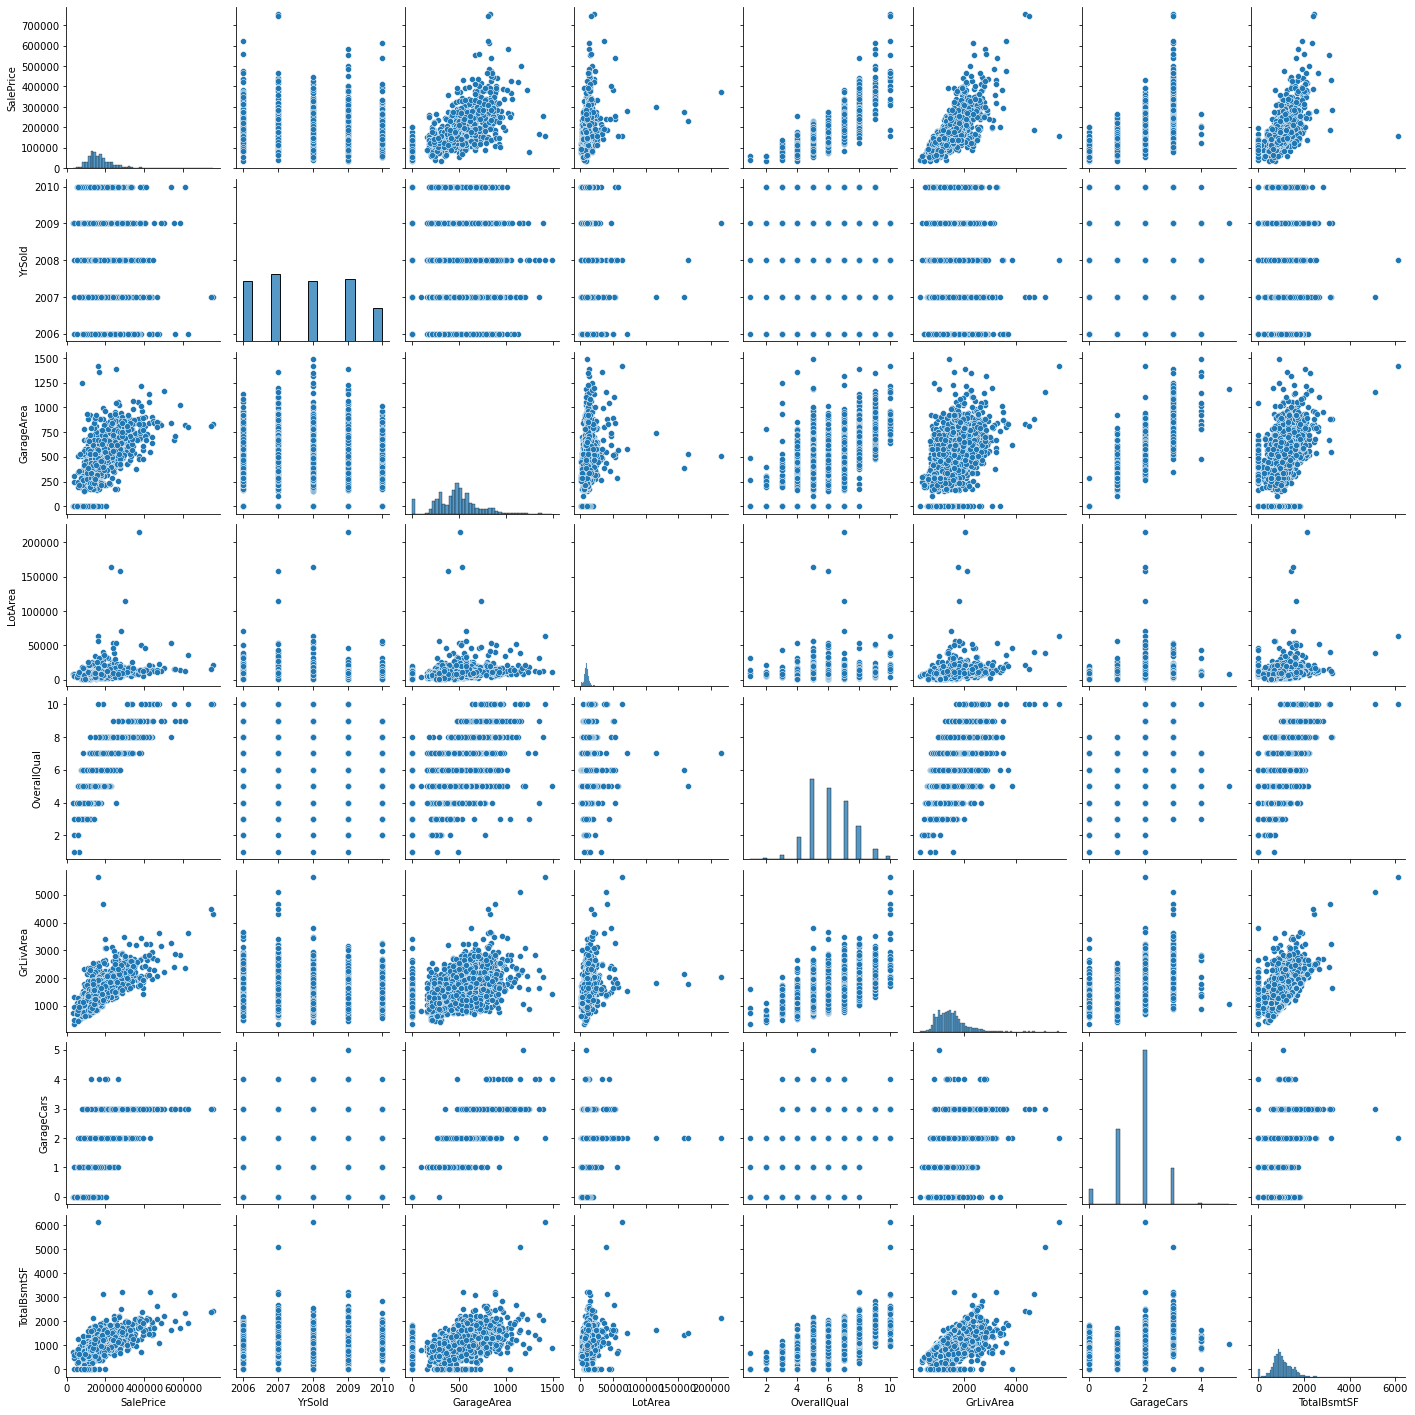

In [10]:
# Plot the relationship between sale price and year of sale, garage area, lot area, and other variables of
# your choice. Choose 7 variables and, along with the response variable, make a scatterplot
# matrix (hint: look at pandas.plotting.scatter_matrix or seaborn.pairplot). Explain what you see.
scatter_df = combine_df[['SalePrice', 'YrSold', 'GarageArea', 'LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]

# pairplot with hue day
sn.pairplot(scatter_df)
# to show
plt.show()

In [11]:
# add dummies for categorical data
combine_df = pd.get_dummies(combine_df, columns=cat_features, drop_first=True)

In [124]:
# Declare X and Y to run varying models 
X = combine_df[:1460].drop(columns=['SalePrice', 'Id'])
Y = combine_df[:1460]['SalePrice']
model = sm.OLS(Y, X).fit()

In [49]:
# Run ordinary least squares on all the features and report which
# features have a 95%confidence interval that contains 0 and which do not. Comment on what this means.

import statsmodels.api as sm

model_prediction = model.predict(a)
model_details = model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              441.6
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        00:48:27   Log-Likelihood:                         -16569.
No. Observations:                1460   AIC:                                  3.364e+04
Df Residuals:                    1209   BIC:                                  3.497e+04
Df Model:                         251                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [93]:
# function that returns values to dataframe so we can query 
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [123]:
# Features that have a 95% confidence interval that contains 0 
results_df = results_summary_to_dataframe(model)
results_df[(0 <= results_df['conf_higher']) & (results_df['conf_lower'] <= 0)].index.values

array(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'BsmtFinSF2',
       'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MSZoning_RH', 'Alley_None', 'Alley_Pave', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1

In [135]:
# Split the training data into a training (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [160]:
# Ordinary least squares using using sklearn methods
from sklearn.linear_model import LinearRegression

# create linear model with train data
regr = LinearRegression().fit(X_train, y_train)

# score testing data
print(regr.score(X_test, y_test))

0.7144948060122666


In [162]:
print('intercept:', regr.intercept_)
print('coefficients:', regr.coef_)

intercept: 478390.81120555126
coefficients: [-6.03977946e+01  7.15023632e+01  7.52827143e-01  7.62267144e+03
  5.54904017e+03  2.67894215e+02  1.17629416e+02  2.49204978e+01
  1.45989377e+01  6.50921510e+00 -1.25776834e+00  1.98504211e+01
  1.08882001e+01  2.83003937e+01 -7.43041565e+00  3.17581704e+01
  1.98266778e+03  1.53191664e+03  3.18482252e+03  2.01339482e+03
 -2.80885680e+03 -1.52136274e+04  1.32160717e+03  4.51610314e+03
 -8.65499806e+01  4.87510632e+03  1.55280909e+01  2.65211088e+01
  6.34263641e+00  2.69132746e+01  4.61434200e+01  1.84086611e+01
  3.24690123e+02  5.27474816e+00 -4.32188570e+02 -9.16604810e+02
  1.62090061e+04  2.64095765e+04  2.23996514e+04  2.00040408e+04
  2.71319192e+04  1.14399540e+03  3.89111104e+02  2.22065116e+03
  5.62454067e+03  1.22371665e+03  9.13423449e+03 -8.71287095e+03
  7.58535754e+03 -4.66957814e+04  8.04746155e+03 -9.05804315e+03
 -2.69865895e+04 -1.26688504e+03  1.04974821e+04 -3.30522516e+04
  1.18125110e+04  3.74759724e+03  1.33657470e+